In [1]:
### Put your NAME and EID here:

# Problem Set 01b

In this first assignment, we want you to get familiar with jupyter notebooks as well as common Python packages that will be used in this class. If you need any help, refer to the documentation hints for the problems.

Make sure you have the following packages installed for Python3:

- numpy
- matplotlib

In [2]:
# imports needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# setting seed, DON'T modify
np.random.seed(10)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [3]:
# no need to modify this
def poly_feature(X,poly = 1):
    # expects an array (X) of shape (n,1)
    newX = []
    for i in range(poly+1):
        newX.append(X**i)
    return np.concatenate(newX, axis=1)

## Problem 1: Linear Regression

For this problem, we will be exploring a simple linear regression example. The data can be found in **ps01.data**.

### Part A.

We want you to:

- First load in the dataset (**ps01.data**) using numpy. 

    - The structure will be a little different than last homework. After using **np.load**, call **.item()** on the object.
    - If done correctly, you should see a dictionary containing the keys **("Xtrain,"Xtest","Ytrain","Ytest")**.
    
    
- Plot both the train and test data (on the same plot), each with a different color. Make sure to include a legend.


Useful modules:
    - np.load
    - plt.scatter, plt.legend


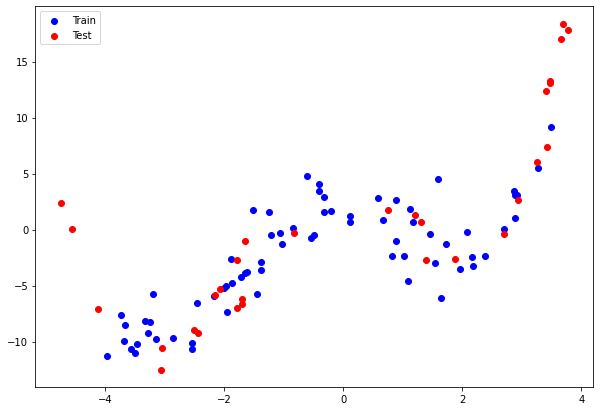

In [4]:
# code here
raw=np.load('ps01.data').item()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(raw['Xtrain'], raw['Ytrain'], c='b', label='Train')
ax1.scatter(raw['Xtest'],raw['Ytest'],c='r',label='Test')
plt.legend(loc='upper left')
plt.show()

### Part B.

We can notice a positive correlation from the previous plot. Thus, let's try to learn a simple linear regression model:

$$y^{(i)} \approx \hat{y}^{(i)} = \beta_0 + \beta_1 x^{(i)}$$

Recall the objective to find the optimal $\beta$:

$$ \min_\beta \sum_i ||y - X\beta||^2 $$

We want you to now:

- Solve for $\beta$ ONLY using **Xtrain** and **Ytrain**. 
    - Make sure to use the right formula. (Does n>d or n<d?)
    - Don't forget to include the extra "1" term in your features to include $\beta_0$. 
    - We have included a function you may use to do this.
    
- Overlay the line with the original data points in a **new plot**.
    - You will want to create a **continuous line** (rather than scatterplot) for the linear regression model.
    - Make sure to include the **test data** in the scatter plot as well.
    - Include a legend labeling each part of the plot.
    
- Does this model fit the test data well? Calculate the **test set error** using the following formula:

$$ E = \frac{1}{n}\sum_{i=1}^n || y^{(i)} - \hat{y}^{(i)} || ^ 2 $$

- Also calculate **both** the **train** and **test** $R^2$ statistic:

$$ R^2 = 1 - \frac{\sum_{i=1}^n ( y^{(i)} - \hat{y}^{(i)} ) ^ 2}{\sum_{i=1}^n (y^{(i)}-\bar{y}) ^ 2} $$

Useful modules:
    - poly_feature
    - np.linalg.inv
    - np.transpose
    - np.linspace
    - np.mean
    - plt.scatter
    - plt.legend

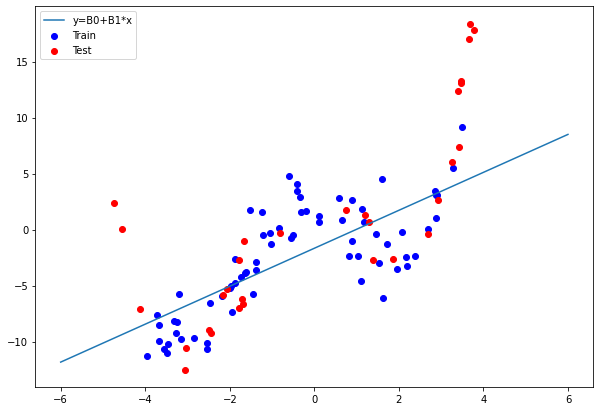

Test Error: 139.47156631715572
Train R^2: 0.554810922639969
Test R^2: 0.48565555805774685


In [5]:
moddedX=poly_feature(raw['Xtrain'],1)

def findBeta(x,y):
    xT=np.transpose(x)
    inv=np.linalg.inv(np.matmul(xT,x))
    return np.matmul(np.matmul(inv,xT),y)

def calcPredY(x,B):
    return np.polyval(B[::-1],x)

def testError(x,y,B):
    error=0
    for i,ys in enumerate(y):
        predY=calcPredY(x[i],B)
        diff=ys-predY[0]
        error+=np.linalg.norm(diff,2)
    return error

def calculateR2(x,y,B):
    yhat = np.polyval(B[::-1],x)                     
    ybar = np.mean(y) 
    num = np.sum((y-yhat)**2)
    den = np.sum((y - ybar)**2)
    return 1-(num / den)
    # ymean=np.mean(y)
    # num=0
    # den=0
    # for i,ys in enumerate(y):
    #     predY=calcPredY(x[i],B)
    #     diff=ys-predY[0]
    #     num+=(diff*diff)
    #     meandif=ys-ymean
    #     den+=(meandif*meandif)
    # return 1-(num/den)


B=findBeta(moddedX,raw['Ytrain'])
xspace = np.linspace(-6,6)
yhat = B[0]+B[1]*xspace
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(raw['Xtrain'], raw['Ytrain'], c='b', label='Train')
ax1.scatter(raw['Xtest'],raw['Ytest'],c='r',label='Test')
ax1.plot(xspace, yhat, label='y=B0+B1*x')
plt.legend(loc='upper left')
plt.show()
print("Test Error: "+str(testError(raw['Xtest'],raw['Ytest'],B)))
print("Train R^2: "+str(calculateR2(raw['Xtrain'],raw['Ytrain'],B)))
print("Test R^2: "+str(calculateR2(raw['Xtest'],raw['Ytest'],B)))

### Part C.

We clearly need a more complex model -- luckily, we can still use linear regression, i.e. only solve for a new $\beta$.

One way to do this is to use non-linear features in our model. One such example is to also include a quadratic term.

$$y^{(i)} \approx \hat{y}^{(i)} = \beta_0 + \beta_1 x^{(i)} + \beta_2 ({x^{(i)}})^2$$

This can still be solved using least squares, since $\beta$ is still linear w.r.t. our quadratic term. We can further extend this to any power $d$: 

$$\hat{y}^{(i)} = \beta_0 + \beta_1 x^{(i)} +\ ...\ + \beta_d (x^{(i)})^d$$

Thus, in this part, we want you to:

- Solve for $\beta$ using $d = [2,3,4,5,6,7]$.

    - Similar to the previous, you can make use of **poly_feature** to generate the features.

- Overlay each new model (each polynomial of degree **d** with coefficients $\beta$) over the train and test data.
    
    - There should only be **one figure**. It will be similar to part B but with 9 continuous lines (rather than 1).
    - Make sure to **label each** in a legend.
    - We suggest setting a **limit** on the y-axis to stay within [-20,20].

- Calculate **test errors** $E_d$ for each d. Plot out an E vs. d plot.

- Calculate **train** and **test** $R^2$ for each d. 
    - Using **only 1** figure, graph **BOTH** the **train** and **test** R2 vs $d$.
    - This should contain **two** solid lines that are labeled with a color. Please include a legend denoting train/test.

- Using these plots, what value of $d$ do you think the data came from? 
    

Useful modules:
    - poly_feature
    - np.linalg.inv
    - np.transpose
    - np.linspace
    - np.mean
    - plt.scatter
    - plt.legend
    - plt.ylim

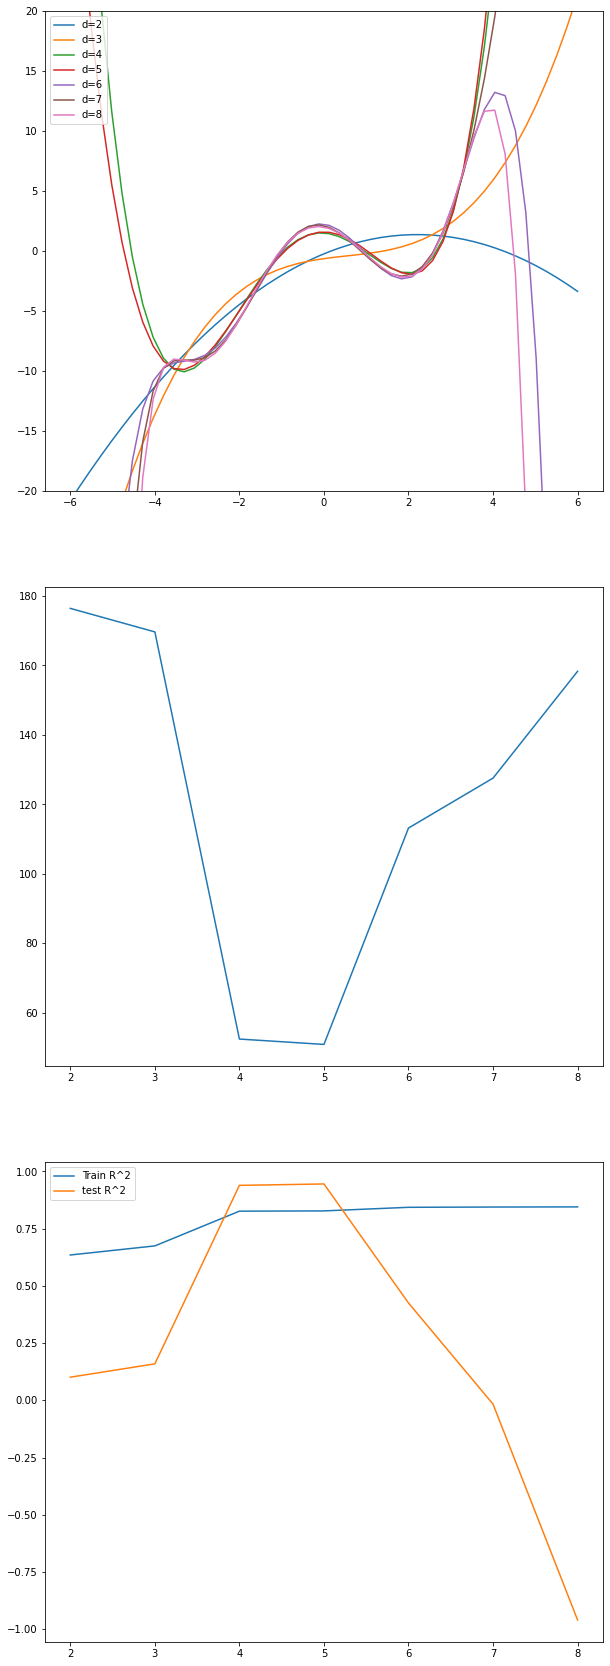

In [6]:
# code here
powers=[2,3,4,5,6,7,8]
error=[0]*len(powers)
trainr2=[0]*len(powers)
testr2=[0]*len(powers)
fig,ax = plt.subplots(3,1,figsize=(10,30))
xspace = np.linspace(-6,6)
for d in powers:
    modded=poly_feature(raw['Xtrain'],d)
    B=findBeta(modded,raw['Ytrain'])
    moddedB=[]
    for beta in B:
        moddedB.append(beta[0])
    poly=np.poly1d(moddedB[::-1])
    yhat=poly(xspace)
    ax[0].plot(xspace, yhat, label="d="+str(d))
    error[d-2]=testError(raw['Xtest'],raw['Ytest'],B)
    trainr2[d-2]=calculateR2(raw['Xtrain'],raw['Ytrain'],B)
    testr2[d-2]=calculateR2(raw['Xtest'],raw['Ytest'],B)

ax[0].legend(loc='upper left')
ax[0].set_title="D vs fit"
ax[0].set_xlabel="X"
ax[0].set_ylabel="Y"
ax[0].set_ylim(-20,20)
ax[1].plot(powers,error,label="error")
ax[1].set_title="D vs error"
ax[1].set_xlabel="d"
ax[1].set_ylabel="Error"
ax[2].plot(powers,trainr2,label="Train R^2")
ax[2].plot(powers,testr2,label="test R^2")
ax[2].legend(loc='upper left')
ax[2].set_title="D vs R^2"
ax[2].set_xlabel="d"
ax[2].set_ylabel="R^2"
plt.show()


## Turn in Instructions

Once you have completed Problems 1 and 2, please submit (for this part of the assignment):

- This .ipynb file.
- A PDF version of this file. To do this:
    1. Go to File -> Download as -> HTML
    2. Open the HTML and Print, and change the **destination** to **PDF**.